In [1]:
import pandas as pd
import numpy as np

In [2]:
MTURK_RES_DIR = "/Users/yiweiluo/mturk_tools/Submiterator/projectfiles/"

In [4]:
CURR_TASK = "cc_stance_LIVE_pilot_0/"

In [244]:
subject_info = pd.read_csv(MTURK_RES_DIR + CURR_TASK + "cc_stance_pilot_0-subject-info.csv")
trial_info = pd.read_csv(MTURK_RES_DIR + CURR_TASK + "cc_stance_pilot_0-trials.csv")

In [245]:
subject_info

,startDate,startTime,comments,criticisms,HitCorrect,HitFamiliar,age,gender,education,party,languages,endTime,timeSpent,likert1,likert2,likert3,likert4,likert5,likert6,workerid
0,Tue Oct 29 2019 12:50:13 GMT-0500 (Central Daylight Time),1572371413516,"thanks for the opportunity, this was an interesting task, and I took my time to provide accurate and useful data. Thanks!",NaN,0,1,22,male,graduated_college,republican,english,1572371987690,9.569567,strong_agree,agree,disagree,strong_agree,strong_disagree,strong_disagree,A2UREJJH126LX9
1,Tue Oct 29 2019 13:57:27 GMT-0400 (Eastern Daylight Time),1572371847606,"Very difficult, more me, anyway.",none. thank you.,0,404,69,female,other,republican,english,1572372493079,10.757883,agree,strong_agree,strong_agree,strong_agree,neutral,strong_disagree,A2APG8MSLJ6G2K
2,Tue Oct 29 2019 14:00:24 GMT-0400 (Eastern Daylight Time),1572372024960,no,none,0,1,39,female,graduated_high_school,democrat,"English, Arabic",1572372368903,5.732383,strong_agree,strong_agree,neutral,strong_agree,disagree,neutral,AMV1E7FFPVAW4
3,Tue Oct 29 2019 14:28:22 GMT-0400 (Eastern Daylight Time),1572373702890,NaN,NaN,0,1,59,female,graduated_college,democrat,eng,1572374379667,11.279617,agree,strong_agree,strong_agree,strong_agree,disagree,disagree,A1GKD3NG1NNHRP
4,Tue Oct 29 2019 13:54:34 GMT-0400 (Eastern Daylight Time),1572371674068,NaN,NaN,0,1,29,male,graduated_college,independent,English,1572372629479,15.923517,strong_agree,strong_agree,agree,strong_agree,agree,strong_agree,A2541C8MY0BYV3


In [246]:
print('Mean time spent:',subject_info['timeSpent'].mean())
print('Max time spent:',subject_info['timeSpent'].max())
print('Min time spent:',subject_info['timeSpent'].min())

Mean time spent: 10.652593333333334
Max time spent: 15.923516666666664
Min time spent: 5.732383333333333


Distribution of reading times per worker:

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
question_groups = trial_info.groupby('trial_sent_id')
for sent_id in question_groups.first().index:
    rts = round(question_groups.get_group(sent_id)['RT']/1000.)
    print(sent_id)
    print('Mean RT: {}\tMin RT: {}\tMax RT: {}'.format(rts.mean(),rts.min(),rts.max()))
    print('\n')

s0
Mean RT: 2.75	Min RT: 1.0	Max RT: 5.0


s1
Mean RT: 9.75	Min RT: 4.0	Max RT: 21.0


s2
Mean RT: 7.0	Min RT: 2.0	Max RT: 19.0


s3
Mean RT: 3.25	Min RT: 2.0	Max RT: 6.0


s4
Mean RT: 1.75	Min RT: 1.0	Max RT: 2.0


t0
Mean RT: 54.0	Min RT: 7.0	Max RT: 188.0


t1
Mean RT: 2.5	Min RT: 2.0	Max RT: 3.0


t10
Mean RT: 7.75	Min RT: 4.0	Max RT: 16.0


t11
Mean RT: 5.0	Min RT: 3.0	Max RT: 10.0


t12
Mean RT: 9.0	Min RT: 5.0	Max RT: 16.0


t13
Mean RT: 48.0	Min RT: 5.0	Max RT: 167.0


t14
Mean RT: 12.25	Min RT: 7.0	Max RT: 18.0


t15
Mean RT: 6.25	Min RT: 3.0	Max RT: 11.0


t16
Mean RT: 10.25	Min RT: 5.0	Max RT: 22.0


t17
Mean RT: 3.75	Min RT: 3.0	Max RT: 6.0


t18
Mean RT: 7.75	Min RT: 5.0	Max RT: 10.0


t19
Mean RT: 7.5	Min RT: 4.0	Max RT: 10.0


t2
Mean RT: 4.75	Min RT: 2.0	Max RT: 7.0


t20
Mean RT: 5.0	Min RT: 2.0	Max RT: 10.0


t21
Mean RT: 4.0	Min RT: 2.0	Max RT: 6.0


t22
Mean RT: 3.5	Min RT: 2.0	Max RT: 6.0


t23
Mean RT: 6.75	Min RT: 4.0	Max RT: 9.0


t24
Mean RT: 4.5	Min RT: 3.0	Ma

In [ ]:
# t0, t13, t3

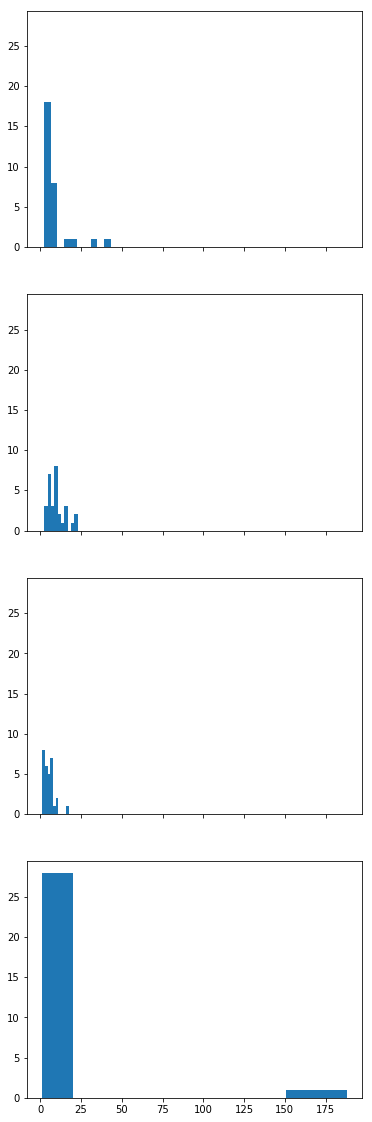

In [227]:
fig,ax_list = plt.subplots(4,1,figsize=(6,20),sharey=True,sharex=True)
for w_id in worker_ids:
    ax_list[w_id].hist(trials_per_worker.get_group(w_id)['RT']/1000.)

Organize party and likert responses:

In [171]:
likert_qs = ["Global average temperatures have been increasing over the past century.",
            "Humans are the primary cause of this global warming.",
            "Global warming is a natural process.",
            "Urgent government action is required to address the problem of global warming.",
            "We should continue to rely on fossil fuels as our primary source of energy.",
            "I trust the ability of news media to provide unbiased coverage of science."]

In [247]:
likert_df = subject_info[['likert{}'.format(ix) for ix in range(1,7)]].T

In [248]:
likert_df['statement'] = likert_qs

In [249]:
likert_df.set_index('statement')

,0,1,2,3,4
statement,,,,,
Global average temperatures have been increasing over the past century.,strong_agree,agree,strong_agree,agree,strong_agree
Humans are the primary cause of this global warming.,agree,strong_agree,strong_agree,strong_agree,strong_agree
Global warming is a natural process.,disagree,strong_agree,neutral,strong_agree,agree
Urgent government action is required to address the problem of global warming.,strong_agree,strong_agree,strong_agree,strong_agree,strong_agree
We should continue to rely on fossil fuels as our primary source of energy.,strong_disagree,neutral,disagree,disagree,agree
I trust the ability of news media to provide unbiased coverage of science.,strong_disagree,strong_disagree,neutral,disagree,strong_agree


In [250]:
subject_info['party']

0    republican 
1    republican 
2    democrat   
3    democrat   
4    independent
Name: party, dtype: object

In [ ]:
# statement 3 "natural process" is confusing?
# Move to first statement?
# "Natural temperature fluctuations account for observed extreme weather events and increasing temperature"

# 1. Fleiss's kappa for 2+ annotators

In [7]:
trial_info.columns

Index(['trial_number', 'RT', 'condition', 'workerid', 'trial_sent_id',
       'option_chosen'],
      dtype='object')

Break trials into chunks for each annotator:

In [251]:
trials_per_worker = trial_info.groupby('workerid')

In [252]:
trials_per_worker.first()

,trial_sent_id,RT,trial_number,condition,option_chosen
workerid,,,,,
0,t9,31346,1,true,neutral
1,s2,18869,1,screen,neutral
2,t14,17574,1,true,agrees
3,t19,11048,1,true,disagrees
4,t12,6544,1,true,neutral


In [258]:
worker_ids = list(trials_per_worker.first().index)

Step 1: Calculate how many assignments went (proportionally) to each category $(P_c)$.

$$P_c=\frac{1}{Aa}\sum_{i=1}^{A}a_{ic},$$

$A =$ number of annotators,
$a =$ number of annotations each annotator created,
$a_{ic} =$ number of annotations in category $c$ for annotator $i$ 

In [254]:
A = 5
a = 30

In [255]:
P_agree = 1./(A*a)*(np.sum([np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'agrees')
                           for w_id in worker_ids]))
P_disagree = 1./(A*a)*(np.sum([np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'disagrees')
                           for w_id in worker_ids]))
P_neutral = 1./(A*a)*(np.sum([np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'neutral')
                           for w_id in worker_ids]))

In [256]:
P_neutral

0.5133333333333334

Step 2: Calculate each annotator's agreement with other annotators, compared to all possible agreement values ($P_i$):

$$P_i = \frac{(\sum_{c=1}^ka_{ic}^2)-a}{a(a-1)},$$

$k =$ number of categories.

In [257]:
k = 3

In [259]:
P_annotators = {}
for w_id in worker_ids:
    P_annotators[w_id] = (np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'agrees')**2+\
    np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'disagrees')**2+\
    np.sum(trials_per_worker.get_group(w_id)['option_chosen'] == 'neutral')**2-a)/(a*(a-1.))

In [260]:
P_annotators

{0: 0.45057471264367815,
 1: 0.3195402298850575,
 2: 0.37471264367816093,
 3: 0.4850574712643678,
 4: 0.3724137931034483}

Step 3: Calculate $\bar{P}$, the average of ```P_annotators```:

In [261]:
P_av = np.mean(list(P_annotators.values()))

In [262]:
P_av

0.4004597701149425

Step 4: Calculate $\bar{P_e}$, the average of the expected agreement:

In [263]:
P_e = np.sum(P_agree**2 + P_disagree**2 + P_neutral**2)

In [264]:
P_e

0.38693333333333346

Step 5: Calculate Fleiss's kappa:

$$K = \frac{\bar{P}-\bar{P_e}}{1-\bar{P_e}}$$

In [265]:
kappa = (P_av-P_e)/(1.-P_e)

In [266]:
kappa

0.0220635658682183

"Slight agreement" within the range 0.01 - 0.20.

# 2. Correlation

Fleiss's kappa only measures agreement over category totals. Looking at correlation also gives us a p-value.

In [267]:
labels_per_worker = {}
for w_id in worker_ids:
    worker_labels = trials_per_worker.get_group(w_id).sort_values(by='trial_sent_id')
    worker_labels = worker_labels.set_index('trial_sent_id')
    worker_labels = worker_labels.drop(["trial_number","RT","condition"],axis=1)
    worker_labels.columns = ['worker_{}'.format(w_id)]
    labels_per_worker[w_id] = worker_labels

In [268]:
all_worker_labels = pd.concat([labels_per_worker[0], labels_per_worker[1], labels_per_worker[2], 
                               labels_per_worker[3], labels_per_worker[4]], axis=1)

Add original sentence:

In [127]:
import json

In [148]:
trial_sents = []

In [156]:
with open(MTURK_RES_DIR + CURR_TASK + 'pilot_0_main_trials.jsonlist') as f:
    lines = f.readlines()
for ix in range(0,270,9):
    line_chunk = [l.strip() for l in lines[ix:ix+9]]
    line_chunk = "".join(line_chunk)
    if line_chunk[-1] == ',':
        line_chunk = line_chunk[:-1]
    trial_sents.append(json.loads(line_chunk))

In [269]:
all_worker_labels['sentence'] = [item['sentence'] for item in trial_sents]

In [270]:
pd.set_option('display.max_colwidth', -1)
all_worker_labels

,worker_0,worker_1,worker_2,worker_3,worker_4,sentence
trial_sent_id,,,,,,
s0,disagrees,disagrees,disagrees,disagrees,disagrees,Global warming is a hoax.
s1,neutral,neutral,neutral,agrees,agrees,Alarming levels of sea level rise are predicted to threaten Florida over the next decades.
s2,neutral,neutral,neutral,neutral,neutral,The current president of the US is a republican.
s3,agrees,agrees,agrees,agrees,agrees,Global warming is happening and it will be dangerous to human health and welfare.
s4,neutral,neutral,neutral,neutral,neutral,Some dogs are cute.
t0,neutral,agrees,neutral,neutral,neutral,"The term global warming is associated with greater public understanding, emotional engagement, and support for personal and national action than the term climate change."
t1,agrees,agrees,agrees,agrees,agrees,The polar bear is being driven extinct by global warming.
t10,neutral,agrees,neutral,neutral,neutral,The growing deluge of greenhouse gas emissions continue.
t11,neutral,agrees,neutral,neutral,neutral,"Poorer nations adapt to the impacts of global warming, like sea-level rise or droughts."


In [ ]:
# t12, t24, t4, t5, 

Step 1: Make binarized matrices for each annotator.

In [74]:
def convert_int(l):
    return int(l)

In [83]:
worker_matrices = {}

In [86]:
for w_id in worker_ids:
    label_matrix_w = pd.DataFrame.from_dict({'trial_sent_id':all_worker_labels.index,
                                        'agrees':list((all_worker_labels['worker_{}'.format(w_id)] == 'agrees').apply(convert_int)),
                                        'disagrees':list((all_worker_labels['worker_{}'.format(w_id)] == 'disagrees').apply(convert_int)),
                                        'neutral':list((all_worker_labels['worker_{}'.format(w_id)] == 'neutral').apply(convert_int))})
    label_matrix_w = label_matrix_w.set_index('trial_sent_id')
    worker_matrices[w_id] = label_matrix_w

In [90]:
worker_matrices[3]

,agrees,disagrees,neutral
trial_sent_id,,,
s0,0,1,0
s1,1,0,0
s2,0,0,1
s3,1,0,0
s4,0,0,1
t0,0,0,1
t1,1,0,0
t10,0,0,1
t11,0,0,1


Step 2: Calculate spearman correlation coefficients for each worker's matrix with the other worker matrices:

In [91]:
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

In [ ]:
# Apply Wilcoxon signed rank test to test significance of each dimension
p_vals = np.apply_along_axis(wilcoxon, 0, corr_per_rater)[1]

In [ ]:
# Apply Bonferroni correction
reject, corr_pvals, _, newalpha = multipletests(
     p_vals, alpha=0.05, method="bonferroni") 

# 3. Krippendorff's alpha

In [92]:
from __future__ import print_function
try:
    import numpy as np
except ImportError:
    np = None


def nominal_metric(a, b):
    return a != b


def interval_metric(a, b):
    return (a-b)**2


def ratio_metric(a, b):
    return ((a-b)/(a+b))**2


def krippendorff_alpha(data, metric=interval_metric, force_vecmath=False, convert_items=float, missing_items=None):
    '''
    Calculate Krippendorff's alpha (inter-rater reliability):
    
    data is in the format
    [
        {unit1:value, unit2:value, ...},  # coder 1
        {unit1:value, unit3:value, ...},   # coder 2
        ...                            # more coders
    ]
    or 
    it is a sequence of (masked) sequences (list, numpy.array, numpy.ma.array, e.g.) with rows corresponding to coders and columns to items
    
    metric: function calculating the pairwise distance
    force_vecmath: force vector math for custom metrics (numpy required)
    convert_items: function for the type conversion of items (default: float)
    missing_items: indicator for missing items (default: None)
    '''
    
    # number of coders
    m = len(data)
    
    # set of constants identifying missing values
    if missing_items is None:
        maskitems = []
    else:
        maskitems = list(missing_items)
    if np is not None:
        maskitems.append(np.ma.masked_singleton)
    
    # convert input data to a dict of items
    units = {}
    for d in data:
        try:
            # try if d behaves as a dict
            diter = d.items()
        except AttributeError:
            # sequence assumed for d
            diter = enumerate(d)
            
        for it, g in diter:
            if g not in maskitems:
                try:
                    its = units[it]
                except KeyError:
                    its = []
                    units[it] = its
                its.append(convert_items(g))


    units = dict((it, d) for it, d in units.items() if len(d) > 1)  # units with pairable values
    n = sum(len(pv) for pv in units.values())  # number of pairable values
    
    if n == 0:
        raise ValueError("No items to compare.")
    
    np_metric = (np is not None) and ((metric in (interval_metric, nominal_metric, ratio_metric)) or force_vecmath)
    
    Do = 0.
    for grades in units.values():
        if np_metric:
            gr = np.asarray(grades)
            Du = sum(np.sum(metric(gr, gri)) for gri in gr)
        else:
            Du = sum(metric(gi, gj) for gi in grades for gj in grades)
        Do += Du/float(len(grades)-1)
    Do /= float(n)

    if Do == 0:
        return 1.

    De = 0.
    for g1 in units.values():
        if np_metric:
            d1 = np.asarray(g1)
            for g2 in units.values():
                De += sum(np.sum(metric(d1, gj)) for gj in g2)
        else:
            for g2 in units.values():
                De += sum(metric(gi, gj) for gi in g1 for gj in g2)
    De /= float(n*(n-1))

    return 1.-Do/De if (Do and De) else 1.


if __name__ == '__main__': 
    print("Example from http://en.wikipedia.org/wiki/Krippendorff's_Alpha")

    data = (
        "*    *    *    *    *    3    4    1    2    1    1    3    3    *    3", # coder A
        "1    *    2    1    3    3    4    3    *    *    *    *    *    *    *", # coder B
        "*    *    2    1    3    4    4    *    2    1    1    3    3    *    4", # coder C
    )

    missing = '*' # indicator for missing values
    array = [d.split() for d in data]  # convert to 2D list of string items
    
    print("nominal metric: %.3f" % krippendorff_alpha(array, nominal_metric, missing_items=missing))
    print("interval metric: %.3f" % krippendorff_alpha(array, interval_metric, missing_items=missing))

Example from http://en.wikipedia.org/wiki/Krippendorff's_Alpha
nominal metric: 0.691
interval metric: 0.811


In [95]:
all_worker_labels.index

Index(['s0', 's1', 's2', 's3', 's4', 't0', 't1', 't10', 't11', 't12', 't13',
       't14', 't15', 't16', 't17', 't18', 't19', 't2', 't20', 't21', 't22',
       't23', 't24', 't3', 't4', 't5', 't6', 't7', 't8', 't9'],
      dtype='object', name='trial_sent_id')

In [103]:
label2int = {'agrees':1,'neutral':0,'disagrees':-1}

In [273]:
data_per_coder = []
for w_id in worker_ids:
    worker_data_dict = {sent_index: label2int[all_worker_labels['worker_{}'.format(w_id)].loc[sent_index]] 
                        for sent_index in all_worker_labels.index if sent_index[0] == 's'}
    data_per_coder.append(worker_data_dict)

In [274]:
# Agreement for screen questions
krippendorff_alpha(data_per_coder)

0.8783783783783784

In [272]:
# Agreement for full questions
krippendorff_alpha(data_per_coder)

0.5345920745920746

In [275]:
# Pairwise agreements for full questions
for worker_id_a in [0,1,2,3]:
    for worker_id_b in range(worker_id_a+1,5):
        data_per_coder = []
        for w_id in [worker_id_a,worker_id_b]:
            worker_data_dict = {sent_index: label2int[all_worker_labels['worker_{}'.format(w_id)].loc[sent_index]] 
                                for sent_index in all_worker_labels.index}
            data_per_coder.append(worker_data_dict)
        print("Alpha b/w worker_{} and worker_{}:\t{}".format(worker_id_a,worker_id_b,
                                                              krippendorff_alpha(data_per_coder)))
        print('({}, {})'.format(subject_info.iloc[worker_id_a]['party'],
                                                               subject_info.iloc[worker_id_b]['party']))
        print('\n')

Alpha b/w worker_0 and worker_1:	0.5856293895191789
(republican, republican)


Alpha b/w worker_0 and worker_2:	0.32429174201326105
(republican, democrat)


Alpha b/w worker_0 and worker_3:	0.7656870532168387
(republican, democrat)


Alpha b/w worker_0 and worker_4:	0.5670446964643097
(republican, independent)


Alpha b/w worker_1 and worker_2:	0.3771593090211133
(republican, democrat)


Alpha b/w worker_1 and worker_3:	0.5986394557823129
(republican, democrat)


Alpha b/w worker_1 and worker_4:	0.47529644268774707
(republican, independent)


Alpha b/w worker_2 and worker_3:	0.5390625
(democrat, democrat)


Alpha b/w worker_2 and worker_4:	0.4813186813186814
(democrat, independent)


Alpha b/w worker_3 and worker_4:	0.7534818941504178
(democrat, independent)


